In [1]:
import xarray as xr
import numpy as np
import cftime
import nc_time_axis
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import ticker, cm
from cftime import datetime 
import datetime as dt
import matplotlib.colors as colors
import math
import random
import matplotlib.cm as mcm
from matplotlib.ticker import MaxNLocator
#jet = mcm.get_cmap('jet')
jet = mcm.get_cmap('jet') if isinstance(mcm.get_cmap('jet'), str) else mcm.get_cmap('jet')
import netCDF4 as nc
import sys
import os
import psutil
import netCDF4 as nc
import cartopy.crs as ccrs # CRS stands for "Coordinate reference systems" for map projection
from cartopy.crs import PlateCarree
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from dateutil import tz
import pytz
import time
from time import process_time
from tqdm import tqdm
import dask.array as da
import dask.dataframe as dd
import dask
%matplotlib inline 
#import line_profiler
#%load_ext line_profiler

/tmp/ipykernel_2181954/892673583.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet = mcm.get_cmap('jet') if isinstance(mcm.get_cmap('jet'), str) else mcm.get_cmap('jet')


In [2]:
### Raw satellite data ###
filepath = './Nc_Files/s4max/ssn_s4lonavg_lat_lon_ds_2006_12.nc'

ds = xr.open_dataset(filepath)
ds

<xarray.Dataset>
Dimensions:    (latitude: 95, longitude: 144)
Coordinates:
  * latitude   (latitude) float64 -90.0 -88.11 -86.21 ... 84.32 86.21 88.11
  * longitude  (longitude) float64 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
Data variables:
    s4max      (latitude, longitude) float64 ...
Attributes:
    averaging_period:  Monthly

In [3]:
s4max = ds["s4max"]
lat = ds['latitude']
lon = ds['longitude']

In [4]:
s4max

<xarray.DataArray 's4max' (latitude: 95, longitude: 144)>
[13680 values with dtype=float64]
Coordinates:
  * latitude   (latitude) float64 -90.0 -88.11 -86.21 ... 84.32 86.21 88.11
  * longitude  (longitude) float64 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5

In [24]:

# Assuming s4max is a DataArray or Dask array
# For DataArray:
not_nan_elements = np.logical_not(np.isnan(s4max.values))

# For Dask array:
not_nan_elements = np.logical_not(np.isnan(s4max.compute()))

# Check if there are any elements that are not NaN
has_not_nan_elements = np.any(not_nan_elements)

if has_not_nan_elements:
    print("There are non-NaN elements in s4max.")
else:
    print("All elements in s4max are NaN.")

There are non-NaN elements in s4max.


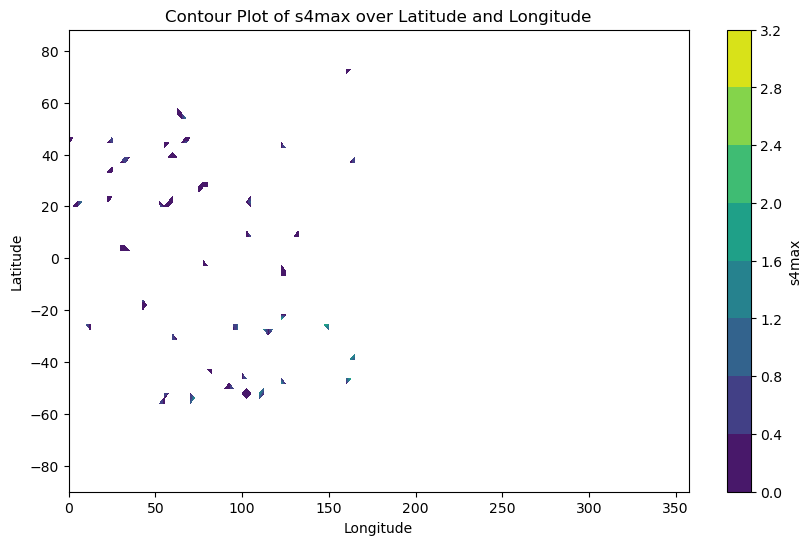

In [5]:

# Convert DataArrays to NumPy arrays
s4max_values = s4max.values
lat_values = lat.values
lon_values = lon.values

# Create a contour plot
plt.figure(figsize=(10, 6))
contour = plt.contourf(lon_values, lat_values, s4max_values, cmap='viridis')
plt.colorbar(contour, label='s4max')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Contour Plot of s4max over Latitude and Longitude')
plt.show()


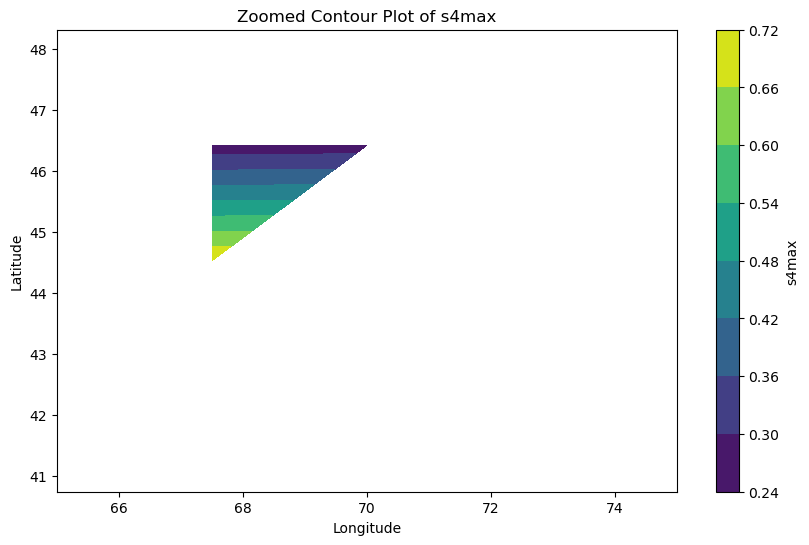

In [20]:
import matplotlib.pyplot as plt

# Assuming s4max, lat, and lon are DataArrays
s4max = ds["s4max"]
lat = ds['latitude']
lon = ds['longitude']


s4max_plot = s4max[0,:,:]

# Specify the latitude and longitude range for zooming in
lat_min, lat_max = 40, 50  # Adjust these values as needed
lon_min, lon_max = 65, 75  # Adjust these values as needed

# Filter the data for the selected latitude and longitude range
s4max_zoomed = s4max_plot.sel(latitude=slice(lat_min, lat_max), longitude=slice(lon_min, lon_max)).values
lat_values = lat.sel(latitude=slice(lat_min, lat_max)).values
lon_values = lon.sel(longitude=slice(lon_min, lon_max)).values

# Create a contour plot for the zoomed area
plt.figure(figsize=(10, 6))
contour = plt.contourf(lon_values, lat_values, s4max_zoomed, cmap='viridis')
plt.colorbar(contour, label='s4max')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Zoomed Contour Plot of s4max')
plt.show()


In [21]:

for (lat, lon), value in np.ndenumerate(s4max_zoomed):
    print(f'Latitude: {lat_values[lat]:.2f}, Longitude: {lon_values[lon]:.2f}, s4max: {value:.2f}')


Latitude: 40.74, Longitude: 65.00, s4max: nan
Latitude: 40.74, Longitude: 67.50, s4max: nan
Latitude: 40.74, Longitude: 70.00, s4max: nan
Latitude: 40.74, Longitude: 72.50, s4max: nan
Latitude: 40.74, Longitude: 75.00, s4max: nan
Latitude: 42.63, Longitude: 65.00, s4max: nan
Latitude: 42.63, Longitude: 67.50, s4max: nan
Latitude: 42.63, Longitude: 70.00, s4max: nan
Latitude: 42.63, Longitude: 72.50, s4max: nan
Latitude: 42.63, Longitude: 75.00, s4max: nan
Latitude: 44.53, Longitude: 65.00, s4max: nan
Latitude: 44.53, Longitude: 67.50, s4max: 0.71
Latitude: 44.53, Longitude: 70.00, s4max: nan
Latitude: 44.53, Longitude: 72.50, s4max: nan
Latitude: 44.53, Longitude: 75.00, s4max: nan
Latitude: 46.42, Longitude: 65.00, s4max: nan
Latitude: 46.42, Longitude: 67.50, s4max: 0.26
Latitude: 46.42, Longitude: 70.00, s4max: 0.27
Latitude: 46.42, Longitude: 72.50, s4max: nan
Latitude: 46.42, Longitude: 75.00, s4max: nan
Latitude: 48.32, Longitude: 65.00, s4max: nan
Latitude: 48.32, Longitude: 67.